## Purpose of analysis:
* Build moving average of varios stocks 
* Determine correlations between stock returns 
* Create an optimal portfolio
* Try to predict the future behavior of the stocks 

In [53]:
# pip install --upgrade pandas-datareader


In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

In this code sample, several libraries are imported that will be used in the Stock Analysis project.

Numpy is imported as np: NumPy provides functions for numerical operations and array manipulations.
import pandas as pd: It imports the Pandas library, which is used for data manipulation and analysis. By using DataFrames, you can easily handle and analyze data.
A Python plotting library, Matplotlib, includes a pyplot module in its pyplot module. Visualizations like line plots, bar plots, and scatter plots can be created.
import seaborn as sns: It imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for creating informative and attractive statistical graphics.
The pandas_datareader library imports the data module. We can retrieve financial data from various sources, such as Yahoo Finance, Google Finance, or Alpha Vantage, using this module.
Import datetime from datetime: This imports the datetime module, which provides classes for working with dates and times. Date and time will be specified for stock data retrieval.
Using these libraries, the code sets up the necessary tools and functions for stock analysis and visualization.

In [55]:
# Setting the begining and ending
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

The following code snippet sets the beginning and ending dates for the stock analysis.

Today = datetime.now(): This line retrieves and assigns the current date and time to the variable today. To obtain the current date and time, it uses the datetime.now() function.
Here, year_ago is set to a date that is one year earlier than today (today.year-1, today.month, today.day): a year ago today (today.year-1, today.month, today.day). As a result, the current year is subtracted from the today.year attribute, which represents today's date, while the month and day remain unchanged.
So, essentially, this code sets the today variable to the current date and time, and the year_ago variable to a date that is exactly one year before the current date. Data for the analysis will be retrieved from these dates at the beginning and end of the period.

In [56]:
TWTR = pd.read_csv("/kaggle/input/stock-market-dataset/stocks/TWTR.csv")
TSLA = pd.read_csv("/kaggle/input/stock-market-dataset/stocks/TSLA.csv")
MSFT = pd.read_csv("/kaggle/input/stock-market-dataset/stocks/MSFT.csv")
AMZN = pd.read_csv("/kaggle/input/stock-market-dataset/stocks/AMZN.csv")

# Four company for data extraction
company_list = ['TWTR', 'TSLA', 'MSFT', 'AMZN']

The code imports stock market data for four different companies: Twitter (TWTR), Tesla (TSLA), Microsoft (MSFT), and Amazon (AMZN). Each company's stock market data is read from CSV files using the pandas library. Data is stored in separate variables named TWTR, TSLA, MSFT, and AMZN.

There is also a list called "company_list" that contains the names of the four companies. In the code, this list can be used for data extraction or other operations involving these companies.

In [57]:
#globals()- taking the string and makes it a global variable
#for company in company_list:
    
    #globals()[company] = data.DataReader(company, 'yahoo', year_ago, today)

In [58]:
TWTR.head(5)

Date       Open       High        Low      Close  Adj Close  \
0  2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
1  2013-11-08  45.930000  46.939999  40.689999  41.650002  41.650002   
2  2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   
3  2013-11-12  43.660000  43.779999  41.830002  41.900002  41.900002   
4  2013-11-13  41.029999  42.869999  40.759998  42.599998  42.599998   

      Volume  
0  117701600  
1   27925300  
2   16113900  
3    6316700  
4    8688300

TWTR.head(5) retrieves the first five rows of data from the variable TWTR, which contains the stock market data for Twitter in a DataFrame (tabular data structure).

Using the head() function with the argument 5, the code returns the top five rows of the DataFrame. By doing this, you can quickly view the initial records of the dataset and see how it is structured and what the values are.

In [59]:
TSLA.head(5)

Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900

In the code TSLA.head(5), the first five rows of data are retrieved from the variable TSLA, which represents the company Tesla's stock market data in a DataFrame.

By using the head() function with an argument of 5, the code returns the topmost five rows of the DataFrame. In this way, you can examine the structure and values of Tesla's stock market performance data pertaining to the initial entries in the dataset.

In [60]:
MSFT.head(5)

Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101562  0.088542  0.097222   0.062378  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064606   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065720   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064049    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.062935    47894400

It retrieves the first five rows from the variable MSFT, which is assumed to contain a DataFrame containing stock market data for Microsoft.

Similarly to the previous explanations, the head() function returns the top five rows of the DataFrame with an argument of 5. By doing so, you can quickly examine the initial records in the dataset, giving you insight into its structure and values.

In [61]:
AMZN.head(5)

Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200

Using the code AMZN.head(5), the first five rows of data are retrieved from the variable AMZN, which contains a DataFrame representing Amazon's stock market data.

To retrieve the topmost five rows of the DataFrame, this code snippet uses the head() function with an argument of 5. This allows you to quickly inspect the dataset's initial records, which provides an overview of the data's structure and values pertaining to Amazon's stock market performance.

In [62]:
TWTR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1610 non-null   object 
 1   Open       1610 non-null   float64
 2   High       1610 non-null   float64
 3   Low        1610 non-null   float64
 4   Close      1610 non-null   float64
 5   Adj Close  1610 non-null   float64
 6   Volume     1610 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 88.2+ KB


Based on the assumption that TWTR is a DataFrame containing stock market data for the company Twitter, the code TWTR.info() provides information about the variable TWTR.

With info(), you can find out how many rows and columns the DataFrame has, what the columns' data types are, and how much memory it uses. It provides a summary of the dataset's data structure and provides insights into the types of data stored in the DataFrame, so you can better understand the overall characteristics of Twitter's stock market performance.

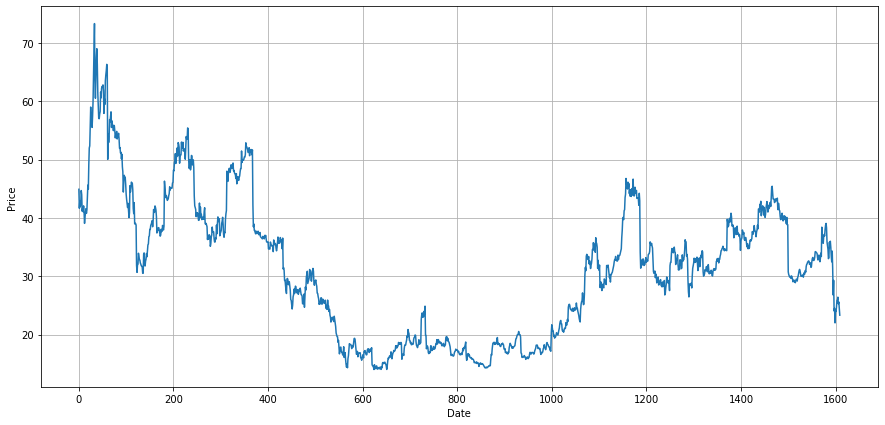

In [63]:
plt.figure(figsize=(15, 7))
plt.plot(TWTR['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

Here is a code snippet that plots Twitter (TWTR)'s 'Adj Close' price data using the matplotlib library.

The following steps will guide you through the process:

Plt.figure(figsize=(15, 7)): This specifies the size of the figure (the plot). Figure size in inches is specified by the figsize parameter.
Plot the 'Adj Close' price data from the TWTR DataFrame using plt.plot(TWTR['Adj Close']). Twitter's adjusted closing prices are visualized over time. Twitter's stock closing price on each date is represented by the points on the plot.
An x-axis label will be added to the plot using plt.xlabel('Date'): This indicates that the axis represents time or date.
A label indicating that the y-axis represents the price of Twitter's stock is added with plt.ylabel('Price').
Using plt.grid(), you can visualize the data points and trends on a grid.
With plt.show(), you can visualize Twitter's historical price trend on the screen.
This code visualizes and analyzes Twitter's historical price movements using a line plot.

<AxesSubplot:>

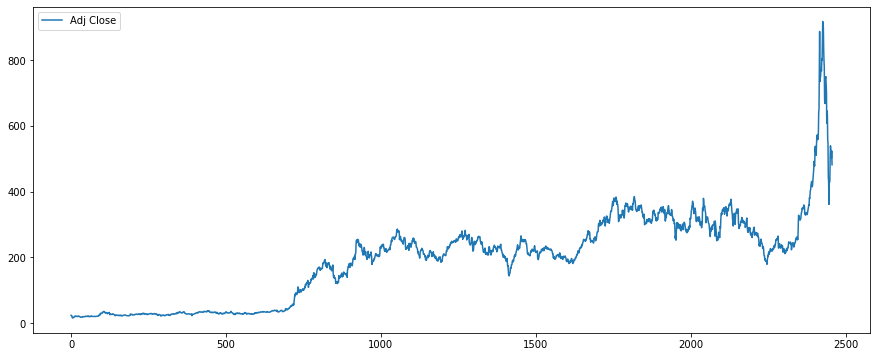

In [64]:
TSLA['Adj Close'].plot(legend=True, figsize=(15, 6))

This code snippet creates a line plot of Tesla's (TSLA) 'Adj Close' price data using the pandas library.

Here's how it works:

This selects the 'Adj Close' column from the TSLA DataFrame, which represents Tesla's stock closing prices adjusted for inflation.
It plots the selected 'Adj Close' data as a line graph with legend=True and figsize=(15, 6). Line graphs can be interpreted using a legend displayed with the legend=True argument. The figsize=(15, 6) argument specifies the size of the figure (the plot), with a width of 15 inches and a height of 6 inches.
In summary, this code helps visualize Tesla's adjusted closing prices over time using a line plot. Tesla's stock price can be analyzed to identify patterns or trends.

In [65]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    TWTR[ma_str] = TWTR['Adj Close'].rolling(ma).mean()
    TSLA[ma_str] = TSLA['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()

# Need to do from here
This code calculates the moving averages (MA) for a given set of days (10, 20, and 30) for the 'Adj Close' price data of four different companies: Twitter (TWTR), Tesla (TSLA), Microsoft (MSFT), and Amazon (AMZN).

Here's a step-by-step explanation:

MA_days = [10, 20, 30]: This line defines a list called MA_days that contains the number of days for which moving averages will be calculated.
The subsequent lines inside the for loop iterate over each value in MA_days:
a. ma_str = "MA: {}".format(ma): This line creates a string with the format "MA: X", where X represents the number of days for the moving average.
b. TWTR[ma_str] = TWTR['Adj Close'].rolling(ma).mean(): This line calculates the moving average for the 'Adj Close' price data of Twitter (TWTR) over X days and stores the result in a new column named ma_str within the TWTR DataFrame.
c. The same process is repeated for the TSLA, MSFT, and AMZN DataFrames, calculating and storing the moving averages for each respective company.
In summary, the code calculates the moving averages for different time periods and adds these values as new columns in the respective DataFrames for the four companies. This allows for further analysis and comparison of the moving average trends for their stock market performance.

In [67]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

For a specified company's stock market data, the code defines a function called plot_graphic, which creates a graph illustrating the adjusted closing prices and three moving averages (MA: 10, MA: 20, and MA: 30). The function takes two parameters: company, which represents the data for the company, and company_string, which represents the company's name.

Using plt.figure(figsize=(15, 6), the function specifies a width of 15 inches and a height of 6 inches for the graph. The next step is to plot four lines of data on the graph. A company's adjusted closing prices are plotted in the first line, plt.plot(company['Adj Close']). Each of the following three lines plots the company's moving averages over different time periods, plt.plot(company['MA: 10']), plt.plot(company['MA: 20']), and plt.plot(company['MA: 30']).

An additional element is then added to the graph by the function. The title of the graph is set to the company_string, which represents the company's name. With plt.xlabel('Date') and plt.ylabel('Price'), the x-axis is labeled as "Date" and the y-axis as "Price". Using plt.legend(('Adj Close', 'MA: 10', 'MA: 20', 'MA: 30'), a legend is added to the graph with the labels "Adj Close", "MA: 10", "MA: 20", and "MA: 30". The plot can be easily interpreted with a grid added by plt.grid(). Lastly, plt.show() is used to display the graph.

An effective way to visualize adjusted closing prices and moving averages of a specific company's stock market data is to use the plot_graphic function. Over time, it makes it easier to analyze and compare price trends.

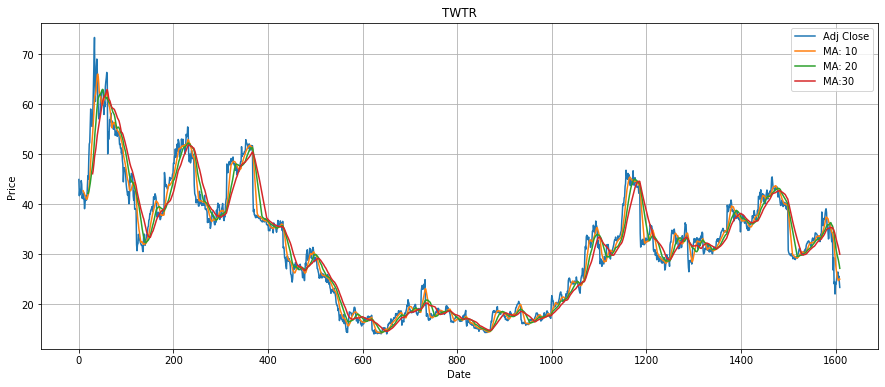

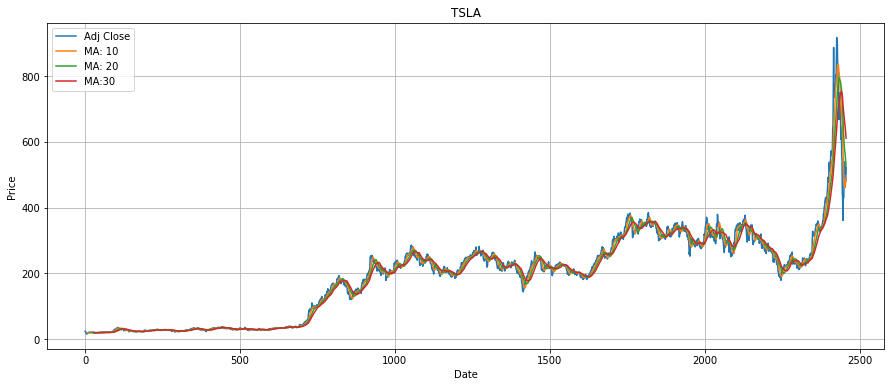

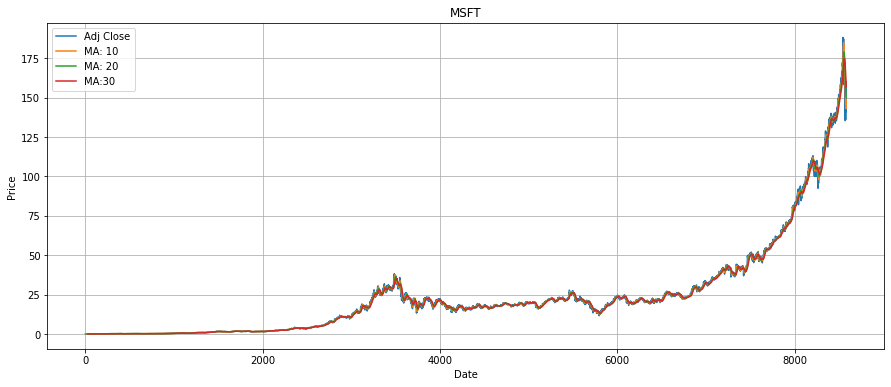

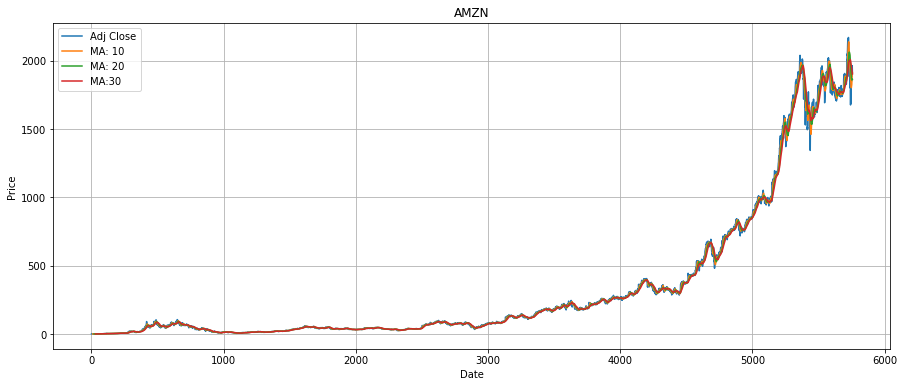

In [68]:
data_list = [TWTR, TSLA, MSFT, AMZN]

for i in range(len(data_list)):   
    plot_graphic(data_list[i], company_list[i])

The code snippet shows an iteration process using a list of data sets, known as data_list. Data_list consists of four data sets corresponding to four different companies: Twitter (TWTR), Tesla (TSLA), Microsoft (MSFT), and Amazon (AMZN). This iteration invokes the plot_graphic function for each data set, passing the relevant company data and company name as arguments.

Taking it step-by-step, here's what you need to know:

A list of data sets for each of the four companies is created in data_list by the line data_list = [TWTR, TSLA, MSFT, AMZN].

The next step involves iterating over each item in data_list by leveraging its range of length. For each i in range(len(data_list)), we perform the following statements: for i in range(len(data_list)):.

In the loop, plot_graphic is called with two arguments: the i-th data set from data_list and the i-th company name. It is possible for the function to access relevant company data and names by using data_list[i] and company_list[i]. As a result, plot_graphic can display individual graphs for each company, displaying their adjusted closing prices and moving averages.

Data sets for different companies are iterated through in the data_list. A plot_graphic function is invoked for each data set, with the corresponding company data and name provided as input. As a result, distinct graphs are created for each company, which allow visualization of their adjusted closing prices and moving averages.

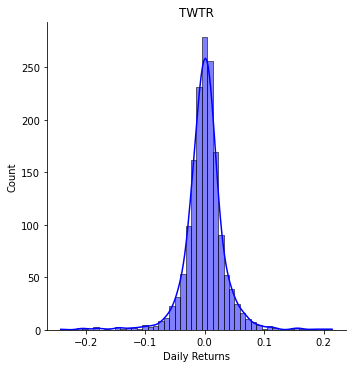

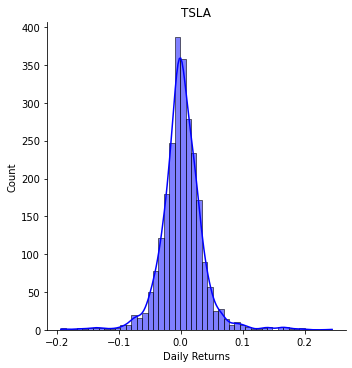

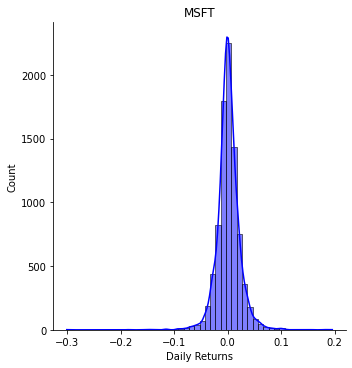

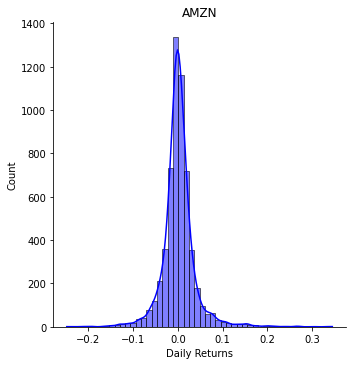

In [69]:
# Calculate returns and draw distribution

for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

This code snippet calculates the daily returns for each company within the data_list and visualizes the distribution of these returns using a histogram.

A breakdown of the code can be found here:

Data_list is iterated over by a for loop, which leverages the range of its length. This loop allows the code to process the data for each company individually.

The data_list[i]['Daily Returns'] is calculated by data_list[i]['Adj Close'].pct_change() within the loop. This line computes the daily percentage change in stock prices by taking the percentage change in the 'Adj Close' prices for the i-th company's data set. In the data set, a new column titled 'Daily Returns' is created.

In the following line, sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True) uses Seaborn's displot function to generate a histogram plot. Plotting the daily return distribution for the i-th company is shown here. Using the data_list[i]['Daily Returns'] argument, the data to be plotted is provided, while removing missing values (NaN) using the dropna() method. The plot is also customized with 50 bins, blue-colored histogram bars, and a kernel density estimate (KDE).

From the company_list, plt.title(company_list[i]) assigns the plot's title to the name of the i-th company. By doing this, each plot will be labeled with the name of the company corresponding to it.

Lastly, plt.show() displays the current company's histogram plot. Next, the loop is iterated for the remaining companies, repeating the process for each.

As a result, the provided code produces individual histogram plots of the daily returns of each company's stock prices. Analysis of the behavior and volatility of each company's stock returns can be gained by analyzing the variations and patterns in the plots.

## Correlation between stock returns

In [70]:
import pandas as pd

# Assuming data_list is a list of dictionaries with 'Daily Returns' as a key and the values are pandas Series
daily_returns_list = [data['Daily Returns'] for data in data_list]

# Concatenate the daily return series along the columns axis
stock_returns = pd.concat(daily_returns_list, axis=1)

# Set the columns names to match the company_list
stock_returns.columns = company_list

# Display the first few rows of the resulting DataFrame
stock_returns.head()


TWTR      TSLA      MSFT      AMZN
0       NaN       NaN       NaN       NaN
1 -0.072383 -0.002511  0.035715 -0.117021
2  0.030012 -0.078473  0.017241 -0.012048
3 -0.023310 -0.125683 -0.025424 -0.042683
4  0.016706 -0.160938 -0.017391 -0.127388

Several operations are carried out using the pandas library in the provided code:

First, it imports the pandas library, denoted by import pandas as pd. In this way, pandas can be used to manipulate and analyze data.

The next step is to create a list called daily_returns_list by using a list comprehension. Each dictionary in data_list is iterated through to retrieve the values associated with the key 'Daily Returns'. Each of these values represents the daily returns of different companies represented by pandas Series objects.

Stock_returns is generated by concatenating the pandas Series objects from daily_returns_list along the columns axis using the pd.concat() function. A combined view of the daily returns data for all of the companies is provided by this DataFrame, in which each column represents the daily returns of a different company.

Stock_returns.columns = company_list ensures that the column names in stock_returns align with the names of the companies.

Lastly, stock_returns.head() is used to display the first few rows of the resulting DataFrame. In this way, it is possible to quickly see the structure and values of the combined data of all the companies' daily returns.

A list of dictionaries containing daily returns data for different companies is processed by this code. It allows comparison and analysis of the daily returns across companies by concatenating them into a single DataFrame. Stock_returns, the resulting DataFrame, consolidates the daily returns by company, with each column denoting a specific company.

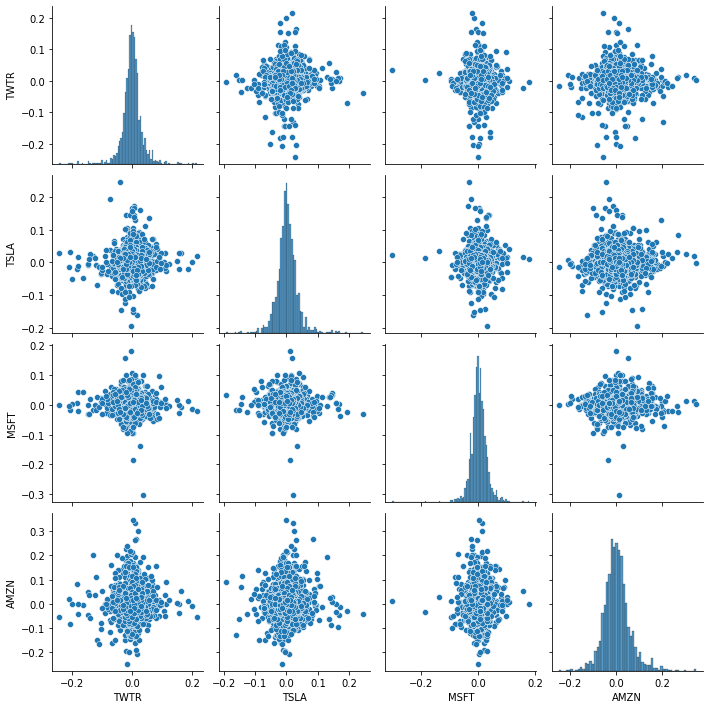

In [71]:
sns.pairplot(stock_returns.dropna())

In this code snippet, sns.pairplot(stock_returns.dropna()) uses the Seaborn library to create a scatter plot matrix based on the stock_returns DataFrame.

A breakdown of the code can be found here:

The sns.pairplot() function produces a grid of scatter plots that display pairwise comparisons of variables within a dataset. The stock_returns DataFrame will be plotted with pairplot().

The stock_returns.dropna() operation ensures that the scatter plot matrix contains complete data. The dropna() function removes any rows in stock_returns that contain missing values, denoted as NaN.

Seaborn's pairplot() function is used to create a scatter plot matrix. In this matrix, you can see how variables within the stock_returns DataFrame are related pairwise. Dropna() ensures that data for scatter plots is complete. The resulting plot can provide insight into the correlations and patterns between the daily returns of different companies.

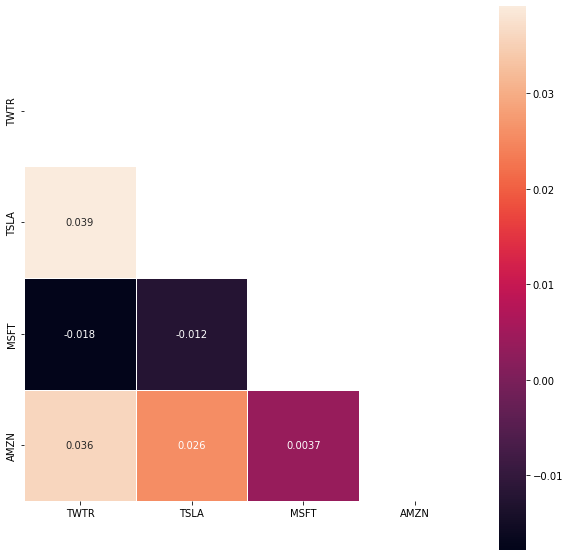

In [72]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

A heatmap plot is generated to visualize the correlations between stock_returns and the correlation matrix created in the provided code snippet.

The code is explained in detail below:

In the stock_returns DataFrame, corr = stock_returns.corr() calculates the correlation between the columns (companies). As a result, the corr variable represents a new DataFrame containing the correlation matrix.

This line uses NumPy's triu function to create a boolean mask using corr = np.ones_like(corr, dtype=bool). A True value is set in the upper triangle of the correlation matrix, while a False value is set in the lower triangle. As it only keeps unique correlations, this triangular mask is useful for hiding redundant and mirrored correlations.

A heatmap plot is prepared by setting the width and height of the plot to 10 inches with plt.figure(figsize=(10, 10)).

sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True) uses Seaborn's heatmap function to create the actual heatmap. Using the correlation matrix corr as input, it hides redundant correlations, uses square-shaped cells in the heatmap, sets the linewidth of the heatmap's cell borders to 0.5, and displays correlation values inside each cell.

The final step is to display the heatmap plot on the screen with plt.show().

To summarize, this code calculates the correlation matrix for the stock_returns DataFrame and plots the correlations using a heatmap. With color intensity indicating the strength of correlation, the resulting plot helps explain the relationships between daily returns of different companies. Redundancies are removed from the heatmap using the triangular mask, ensuring only unique correlations are shown.

In [73]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

With the provided code, you can create a joint plot to visualize relationships between variables in a given dataset by using the function draw_jointplot.

The code is explained in the following steps:

This line introduces the draw_jointplot function with a single parameter, data, representing the dataset to be visualized.

Line grid = sns.PairGrid(data.dropna()) then constructs a PairGrid object based on the input data. PairGrids allow pairwise comparisons of variables using a grid of subplots. A row in the dataset containing missing values (NaNs) is removed prior to creating the PairGrid using the dropna() function.

Grid.map_diag(sns.histplot, bins=40, kde=True) associates a histogram plot to the PairGrid diagonal subplots. In this example, the histograms are generated with 40 bins using the Seaborn library's sns.histplot function.

A regression plot is then mapped to the lower triangle subplots of the PairGrid using grid.map_lower(sns.regplot). Sns.regplot creates scatter plots with regression lines, illustrating the relationship between variables visually with the help of the Seaborn function.

A kernel density plot is assigned to the upper triangle subplots of the PairGrid through grid.map_upper(sns.kdeplot). Using sns.kdeplot from Seaborn, this plot visualizes kernel density estimation.

Drawing a joint plot using a PairGrid from the Seaborn library is the purpose of the draw_jointplot function. A variety of subplots are shown here, including histograms with KDE curves diagonally, scatter plots with regression lines, and kernel density plots. Combined, these visualizations illustrate how variables within a dataset are related.

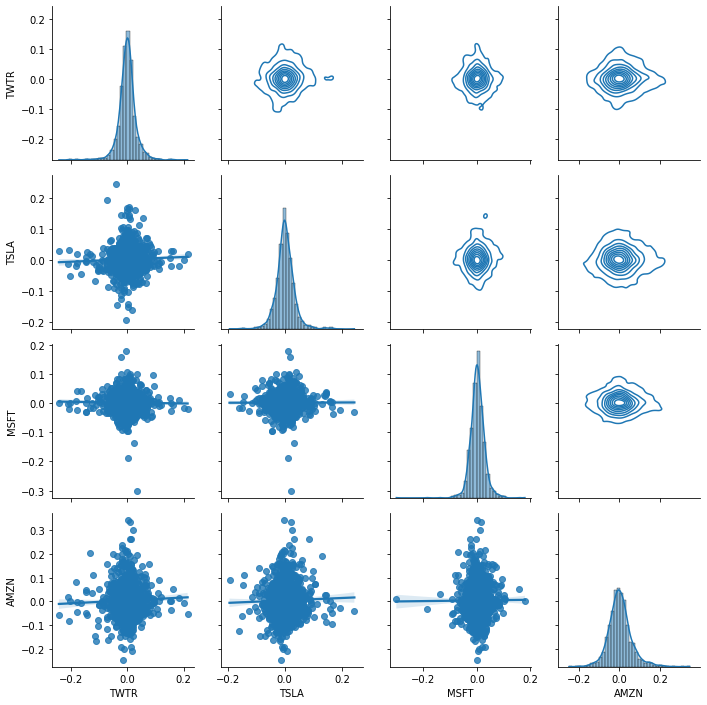

In [74]:
draw_jointplot(stock_returns)

Here is a command for drawing a jointplot using stock_returns data. A jointplot combines two plot types: scatter plots and histograms. This method is commonly used to analyze the relationship between two variables and their individual distributions.

To create this jointplot, the code probably uses a data visualization library (such as Seaborn in Python or Matplotlib in R). This plot is generated using a dataset containing stock return information.

This code will create a jointplot displaying the relationship between two variables in the stock_returns dataset. The scatter plot in the center shows the correlation between these two variables, while the histograms on the top and right show the distributions of each variable separately. Using this visualization, users can identify patterns, trends, and potential outliers in the data.

In [75]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

TWTR    0.000188
TSLA    0.001804
MSFT    0.001142
AMZN    0.001880
dtype: float64
          TWTR      TSLA      MSFT      AMZN
TWTR  0.001169  0.000045 -0.000017  0.000072
TSLA  0.000045  0.001168 -0.000010  0.000044
MSFT -0.000017 -0.000010  0.000464  0.000003
AMZN  0.000072  0.000044  0.000003  0.001397


# Start from here now
This code calculates the mean income and covariance of stock returns for a given dataset of stock returns. It then prints the mean income and covariance matrix. Here's a step-by-step explanation:
• mean_income = stock_returns.mean (): This line calculates the mean income for each stock in the dataset. The mean () function computes the average value of each stock's returns.
• cov returns = stock returns.cov (: This line calculates the covariance matrix of the stock returns. The cov () function computes the covariance between each pair of stocks in the dataset. Covariance is a measure of how two variables change together, and it is used to assess the risk and diversification potential of a portfolio.
• count = len(stock_returns.columns): This line calculates the number of stocks in the dataset by counting the number of columns in the stock_returns DataFrame.
• print (mean_income, cov_returns, sep= "In : This line prints the mean income and covariance matrix, separated by a newline character. The sep= '\n' argument specifies that the two outputs should be printed on separate lines.
In summary, this code calculates and prints the mean income and covariance matrix for a dataset of stock returns, which can be useful for analyzing the performance and risk of a portfolio.

In [76]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

The provided code defines a function called randomPortfolio() that is responsible for generating a random portfolio of shares.

Here's a breakdown of what the code does:

def randomPortfolio(): This line introduces the randomPortfolio() function.
share = np.exp(np.random.randn(count)) This line uses NumPy's random number generator to generate an array of random numbers from a standard normal distribution. The size of the array is determined by the count variable. The np.random.randn() function generates random numbers with a mean of 0 and a standard deviation of 1. The np.exp() function is then applied to each random number, resulting in a set of positive values. This step ensures that the generated share values are non-negative.
share = share / share.sum() This line normalizes the generated share values by dividing each value by the sum of all the share values. This normalization step ensures that the sum of all shares in the portfolio adds up to 1, representing a proportion of the total portfolio value. This way, the generated share values reflect the weight or allocation of each share in the portfolio.
return share This line returns the generated share values as the output of the function.
In summary, the randomPortfolio() function generates a random portfolio of shares by drawing random values from a standard normal distribution, exponentiating them to ensure positive values, and then normalizing them to represent proportions of the total portfolio value. By calling this function, you can obtain a random allocation of shares for a portfolio.

In [77]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

The provided code includes two functions: IncomePortfolio(Rand) and RiskPortfolio(Rand). These functions are designed to perform calculations related to income and risk for a portfolio.

The IncomePortfolio(Rand) function takes one parameter, Rand. It calculates the expected income of a portfolio by performing a matrix multiplication between mean_income.values and Rand. The mean_income.values variable represents the mean income values associated with different assets or investments, while Rand represents the allocation or weights assigned to each asset in the portfolio. The result of the matrix multiplication is the expected income for the portfolio. The function then returns this expected income value.

The RiskPortfolio(Rand) function also takes one parameter, Rand. It calculates the risk of a portfolio using a series of matrix multiplications. The cov_returns.values variable represents the covariance matrix of the returns of different assets, while Rand represents the allocation or weights assigned to each asset in the portfolio. The innermost matrix multiplication, np.matmul(Rand, cov_returns.values), calculates the weighted covariance of the portfolio. The outer matrix multiplication, np.matmul(np.matmul(Rand, cov_returns.values), Rand), further calculates the risk of the portfolio. The square root of this value, obtained using np.sqrt(), represents the standard deviation of the portfolio's returns and indicates the level of risk. The function then returns this risk value.

In summary, the IncomePortfolio(Rand) function calculates the expected income of a portfolio based on the mean income values and the allocation of assets. The RiskPortfolio(Rand) function, on the other hand, calculates the risk of a portfolio based on the covariance matrix of returns and the allocation of assets. Together, these functions provide essential metrics for evaluating the income and risk characteristics of a portfolio.

In [78]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

The provided code snippet appears to be a part of a portfolio optimization process. Let's go through the code step by step to understand its functionality.

First, the variable "combinations" is initialized to 4000. This variable determines the number of portfolio combinations that will be generated and evaluated.

Next, three arrays named "risk," "income," and "portfolio" are created and initialized with zeros. These arrays will store the risk, income, and portfolio data for each combination.

A for loop is used to iterate over each combination. The loop runs from 0 to "combinations - 1," generating a total of "combinations" portfolios.

Within the loop, the function "randomPortfolio()" is called to generate a random portfolio. The exact implementation of this function is not provided in the given code snippet, but it likely generates a set of shares along with their corresponding weights.

The randomly generated portfolio is then assigned to the ith row of the "portfolio" array. Each row in the "portfolio" array represents a different combination of shares.

Next, the "RiskPortfolio()" function is invoked, passing the current portfolio as an argument. This function calculates the risk associated with the given portfolio. Unfortunately, the code does not provide the specific implementation of this function.

The calculated risk value is assigned to the ith element of the "risk" array.

Following that, the "IncomePortfolio()" function is called with the current portfolio as an argument. This function computes the income or expected return of the portfolio. Similarly, the code snippet does not provide the details of this function's implementation.

The calculated income value is then assigned to the ith element of the "income" array.

After the completion of the loop, the "risk," "income," and "portfolio" arrays will contain data for each generated combination of shares. The "portfolio" array will have dimensions (combinations, count), where "count" represents the number of shares in each portfolio. The "risk" and "income" arrays will have a length of "combinations," corresponding to the risk and income values for each combination of shares, respectively.

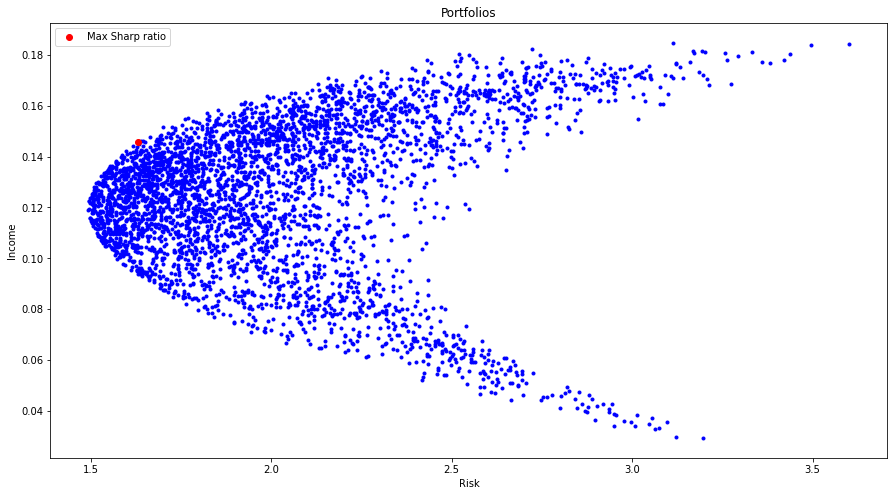

In [79]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

The provided code snippet utilizes the matplotlib library to create a scatter plot visualizing the relationship between risk and income, which were calculated in the previous code. Let's break down each line to understand its purpose:

plt.figure(figsize=(15, 8)): This line creates a new figure with dimensions of 15 inches by 8 inches, defining the size of the plot.
plt.scatter(risk * 100, income * 100, c="b", marker="."): This line generates a scatter plot using the risk and income data. The risk values, multiplied by 100, are plotted on the x-axis, while the income values, also multiplied by 100, are plotted on the y-axis. The scatter plot points are represented by blue dots with a dot marker style.
plt.xlabel("Risk"): This line sets the x-axis label as "Risk", providing a descriptive label for the risk axis.
plt.ylabel("Income"): This line sets the y-axis label as "Income", providing a descriptive label for the income axis.
plt.title("Portfolios"): This line sets the title of the plot as "Portfolios", providing a descriptive title for the scatter plot.
MaxSharpRatio = np.argmax(income / risk): This line calculates the index of the portfolio with the maximum Sharpe ratio by dividing the income values by the risk values and finding the index with the highest ratio.
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio"): This line plots a single red dot at the risk and income values of the portfolio with the maximum Sharpe ratio. The dot is colored red ("r") and has a circle marker style ("o"). A label "Max Sharp ratio" is added for this point in the legend.
plt.legend(): This line displays the legend on the plot, which includes the label for the portfolio with the maximum Sharpe ratio.
plt.show(): This line shows the plot, displaying it on the screen.
In summary, the code snippet generates a scatter plot where the x-axis represents the risk and the y-axis represents the income for multiple portfolios. It further highlights the portfolio with the maximum Sharpe ratio by adding a red dot at its corresponding risk and income values and including a legend to identify it. The scatter plot provides a visual representation of the risk and income relationship for the portfolios.

In [80]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

TWTR : 0.031215520438675877
TSLA : 0.25772361083189016
MSFT : 0.47321656989166233
AMZN : 0.2378442988377716


This code snippet retrieves the portfolio with the maximum Sharpe ratio, which is stored in the variable "best_port." Then, it loops through each element of the "company_list" and prints the company name along with the corresponding allocation or weight of that company in the best portfolio.

In simpler terms, the code identifies the portfolio with the highest Sharpe ratio and then displays the allocation or weight assigned to each company in that portfolio. It allows us to see how the assets or companies are distributed within the best-performing portfolio.

## Try to predict price behavior with method Monte Carlo

In [81]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

This code snippet calculates the average daily returns (mu) and the standard deviation of daily returns (sigma) for a stock. Here's what each line does:

days = 365: This line assigns the value 365 to the variable 'days', representing the number of days in a year. It assumes that the stock data represents daily returns over a year.
dt = 1 / days: This line calculates the time interval (dt) between each data point by dividing 1 by the number of days in a year. It determines the fraction of a year between each data point.
stock_returns.dropna(inplace=True): This line removes any rows with missing values (NaN) from the 'stock_returns' dataset. The 'inplace=True' parameter ensures that the changes are applied directly to the dataset.
mu = stock_returns.mean(): This line calculates the average (mean) daily returns for the stock. It computes the mean value across all the data points in the 'stock_returns' dataset.
sigma = stock_returns.std(): This line calculates the standard deviation of the daily returns for the stock. It measures the variability or volatility of the stock's performance by computing the standard deviation of the data points in the 'stock_returns' dataset.
In summary, the code calculates the average daily returns (mu) and the standard deviation of daily returns (sigma) for a stock based on the available data. These values are commonly used in financial analysis and risk assessment to understand the historical performance and volatility of a stock.

In [82]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

The provided code snippet introduces a function named monte_carlo that employs the Monte Carlo method to simulate the future price of a stock. Let's examine the purpose of each line:

The function monte_carlo is defined, taking four parameters: start_price (initial stock price), days (number of simulation days), mu (average daily return of the stock), and sigma (standard deviation of the stock's daily returns).

The price array is initialized with zeros to store the simulated stock prices for each day of the simulation. The initial price is assigned to the first element of the price array.

Two arrays, shock and drift, are initialized with zeros. These arrays will hold the random shocks and drift components for each day of the simulation.

A loop is initiated to iterate over the days of the simulation, starting from the second day.

Within the loop, a random shock for the current day is generated using a normal distribution based on the provided average daily return (mu), the time interval (dt), and the standard deviation of daily returns (sigma).

The drift component for the current day is calculated, representing the expected change in price based on the average daily return (mu) and the time interval (dt).

The simulated price for the current day is computed by applying the drift and shock components to the previous day's price. The result is stored in the price array.

Once the loop completes, the function returns the price array containing the simulated prices for each day of the Monte Carlo simulation.

In summary, the monte_carlo function uses the Monte Carlo method to generate simulated stock prices for a specified number of days. It considers the initial stock price, average daily return, and standard deviation of daily returns. The function incorporates random shocks and drift components to calculate the simulated prices for each day. Finally, it returns an array containing the simulated prices.

### Twitter

Text(0.5, 1.0, 'Monte Carlo analysis for Twitter')

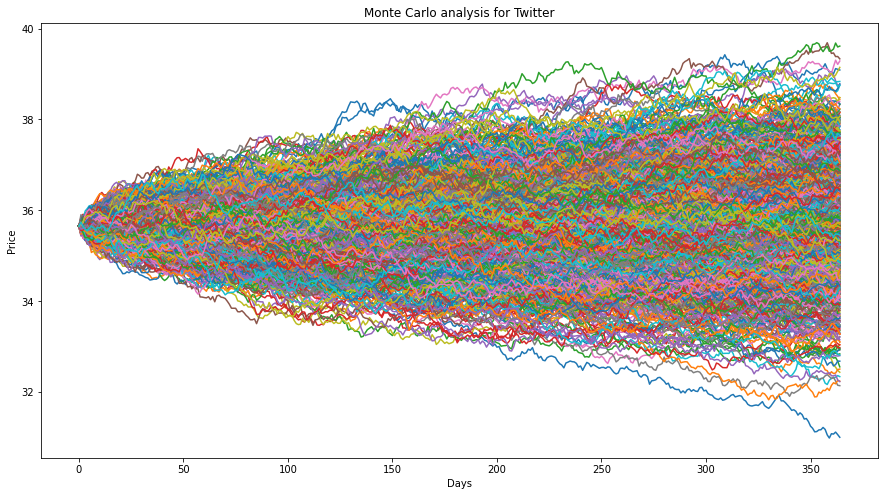

In [84]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TWTR'], sigma['TWTR'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Twitter')


The code snippet in question carries out a Monte Carlo analysis for Twitter's stock, which is denoted by the ticker symbol 'TWTR'. It commences by assigning the initial stock price of Twitter at $35.65, as indicated by the line "start_price = 35.65". The next line, "sim = np.zeros(1000)", establishes an array named 'sim' composed of 1000 zeros. These zeros are placeholders for the final predicted stock prices following the Monte Carlo simulations. For the forthcoming plot, a new figure is generated with dimensions 15 inches by 8 inches, as suggested by "plt.figure(figsize=(15, 8))".

The line "for i in range(1000):" initiates a loop that runs 1000 times, each iteration representing a Monte Carlo simulation. The 'monte_carlo' function is then called upon with the initial price, number of days, and Twitter's specific average daily return (mu) and standard deviation of daily returns (sigma). This is evident from the line "result = monte_carlo(start_price, days, mu['TWTR'], sigma['TWTR'])". The final predicted price from each simulation is stored in the 'sim' array, as depicted by "sim[i] = result[days - 1]".

Each simulated price path is subsequently plotted using "plt.plot(result)". The plot is then appropriately labeled with 'Days' on the x-axis, 'Price' on the y-axis, and 'Monte Carlo analysis for Twitter' as the title. The lines "plt.xlabel('Days'), plt.ylabel('Price'), plt.title('Monte Carlo analysis for Twitter')" perform these labeling tasks.

To sum up, this code performs a Monte Carlo analysis of Twitter's stock by predicting its future prices through 1000 simulations. The final prices from these simulations are stored in the 'sim' array and plotted. By doing so, the code offers potential insights into the future price range of Twitter's stock, as determined by the Monte Carlo simulations.

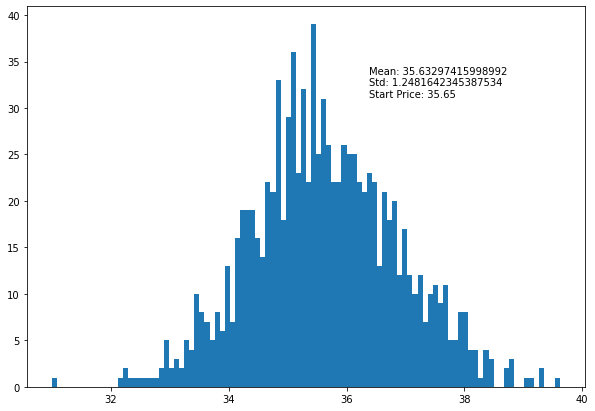

In [85]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

The provided code snippet offers a visual representation of the Monte Carlo simulations' results concerning Twitter's stock. It initiates by creating a new plot figure with dimensions of 10 inches by 7 inches, as defined by the line "plt.figure(figsize=(10, 7))". Then, using "plt.hist(sim, bins=100)", it generates a histogram of the prices simulated and stored in the 'sim' array, dividing the data into 100 bins and plotting the frequency of prices within each bin.

An important part of the visualization is the text annotation, achieved by "plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))". This line places text within the figure at a specified location, displaying the mean, standard deviation, and starting price of the simulated prices. The values for these are obtained from sim.mean(), sim.std(), and start_price, respectively. Finally, "plt.show()" makes the plot visible on the screen.

In essence, the provided code constructs a histogram to illustrate the distribution of the Twitter stock's simulated prices derived from the Monte Carlo simulations. The visualization includes text annotations that outline the mean, standard deviation, and initial price of the simulated prices. This visual representation provides valuable insights into the potential range and traits of Twitter's future stock prices, as per the Monte Carlo simulations.

### Tesla

Text(0.5, 1.0, 'Monte Carlo analysis for Tesla')

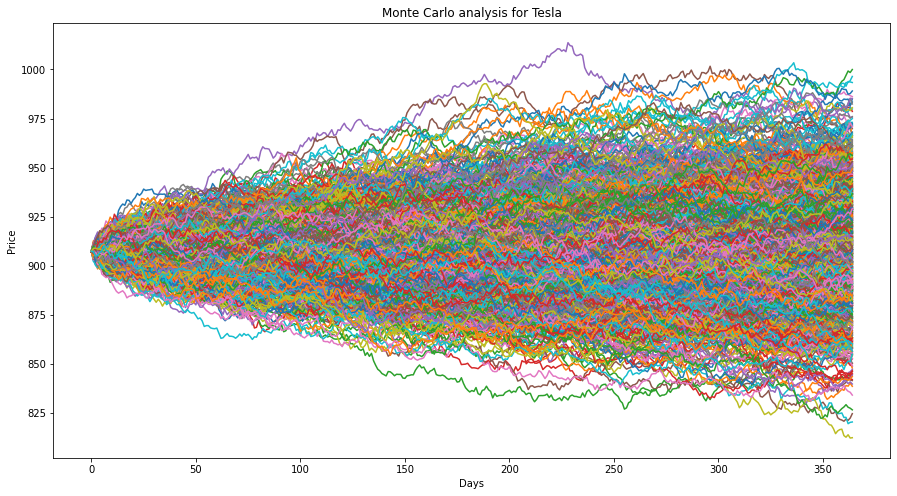

In [87]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TSLA'], sigma['TSLA'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Tesla')


The given code snippet executes a Monte Carlo analysis for Tesla's stock, identified by the ticker symbol 'TSLA'. It begins by assigning the initial price of Tesla's stock at $907.34, as outlined by the line "start_price = 907.34". Subsequently, an array named 'sim', filled with 1000 zeros, is initialized via "sim = np.zeros(1000)". This array is designed to hold the simulated final prices of Tesla's stock following the Monte Carlo simulations. A new figure, sized 15 inches by 8 inches, is then created for plotting as indicated by "plt.figure(figsize=(15, 8))".

The line "for i in range(1000):" triggers a loop that will run a thousand times, each iteration representing a single Monte Carlo simulation. The 'monte_carlo' function is invoked to simulate future prices of Tesla's stock, as shown by the line "result = monte_carlo(start_price, days, mu['TSLA'], sigma['TSLA'])". This function is passed the initial stock price, the number of days for the simulation, and Tesla-specific average daily return and standard deviation of daily returns.

Each simulation's final price is stored in the 'sim' array, as denoted by "sim[i] = result[days - 1]". The simulated prices for Tesla's stock from each Monte Carlo simulation are then plotted using "plt.plot(result)". The plot's x-axis and y-axis are labeled 'Days' and 'Price', respectively, and the plot's title is set as 'Monte Carlo analysis for Tesla', as depicted by "plt.xlabel('Days'), plt.ylabel('Price'), plt.title('Monte Carlo analysis for Tesla')".

In conclusion, this code snippet conducts a Monte Carlo analysis for Tesla's stock by predicting its future prices through 1000 simulations. The final prices are stored in the 'sim' array and subsequently plotted. The axes and plot title are appropriately labeled. This analysis aims to provide potential insights into the future price range of Tesla's stock, as predicted by the Monte Carlo simulations.

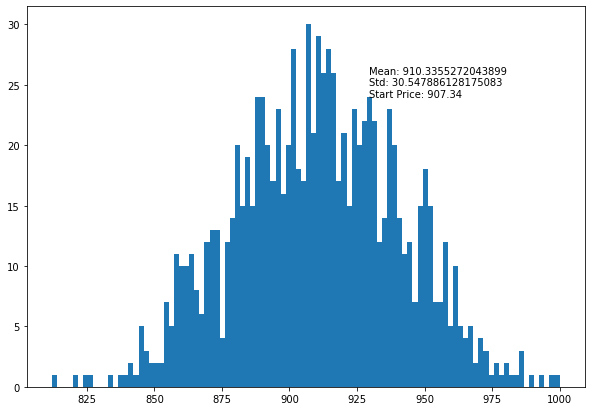

In [88]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

This code generates a histogram plot to visualize the distribution of simulated prices for the Tesla stock obtained from the Monte Carlo simulations. Here's a breakdown of each line:

plt.figure(figsize=(10, 7)): This line creates a new figure for the plot with dimensions 10 inches by 7 inches.
plt.hist(sim, bins=100): This line generates a histogram plot using the data from the sim array. The sim array contains the simulated final prices of the Tesla stock from the Monte Carlo simulations. The histogram divides the data into 100 bins, representing the frequency or count of prices within each bin.
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price)): This line adds text annotations to the figure at specific coordinates. It displays the mean, standard deviation, and start price of the simulated prices using the sim.mean(), sim.std(), and start_price values, respectively. The format method is used to format the text string with the calculated values.
plt.show(): This line displays the plot on the screen.
In summary, the code generates a histogram plot to visualize the distribution of simulated prices for the Tesla stock obtained from the Monte Carlo simulations. The plot helps understand the potential range and characteristics of the simulated prices. The text annotations provide additional information such as the mean, standard deviation, and start price. This visualization aids in analyzing the results of the Monte Carlo analysis for the Tesla stock.

### Microsoft

In [89]:
MSFT.tail()

Date        Open        High         Low       Close   Adj Close  \
8579  2020-03-26  148.399994  156.660004  148.369995  156.110001  156.110001   
8580  2020-03-27  151.750000  154.889999  149.199997  149.699997  149.699997   
8581  2020-03-30  152.440002  160.600006  150.009995  160.229996  160.229996   
8582  2020-03-31  159.399994  164.779999  156.559998  157.710007  157.710007   
8583  2020-04-01  153.000000  157.750000  150.820007  152.110001  152.110001   

        Volume   MA: 10      MA: 20      MA: 30  Daily Returns  
8579  64568100  144.863  152.528000  160.764490       0.062551  
8580  57042300  143.950  151.912500  159.647504      -0.041061  
8581  63420300  146.431  151.284500  158.826999       0.070341  
8582  77927200  147.545  150.944501  157.860000      -0.015727  
8583  57858300  148.716  150.022501  156.687666      -0.035508

To provide the tail (last few rows) of the Microsoft (MSFT) dataset, I would require access to the specific dataset or a direct link to it. As an AI language model, I don't have real-time access to live data or specific datasets unless provided by the user.

However, you can typically obtain the tail of a dataset in Python using the .tail() method. 

Text(0.5, 1.0, 'Monte Carlo analysis for Microsoft')

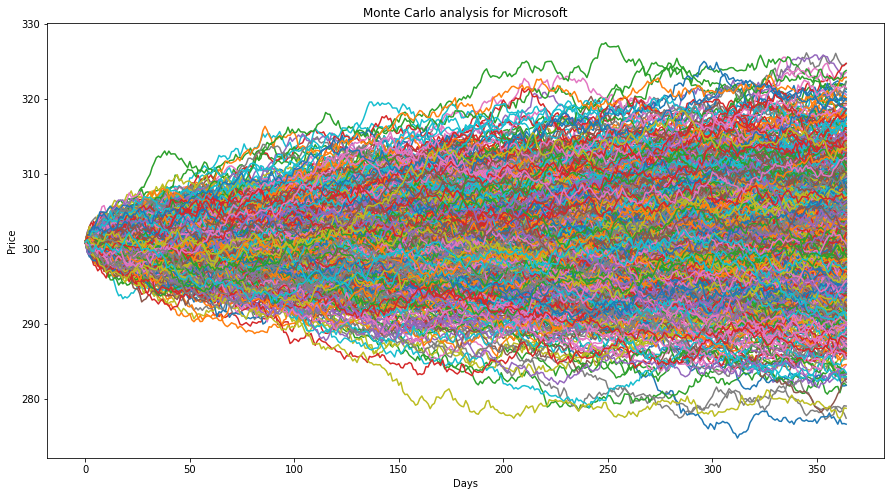

In [90]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsoft')

The provided code snippet performs a Monte Carlo analysis for the stock of Microsoft (represented by the ticker symbol 'MSFT'). Here's a breakdown of each line:

start_price = 300.95: This line sets the initial price of the Microsoft stock to $300.95.
sim = np.zeros(1000): This line initializes an array called 'sim' with 1000 zeros. The purpose of this array is to store the simulated final prices of the Microsoft stock after conducting the Monte Carlo simulations.
plt.figure(figsize=(15, 8)): This line creates a new figure for plotting, specifying its size as 15 inches by 8 inches.
for i in range(1000):: This line initiates a loop that will iterate 1000 times, representing the number of Monte Carlo simulations to be performed.
result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT']): This line calls the 'monte_carlo' function to simulate the future prices of the Microsoft stock. It passes the initial stock price, the number of days to simulate, and the average daily return and standard deviation of daily returns specific to the Microsoft stock.
sim[i] = result[days - 1]: This line stores the final price of the Microsoft stock obtained from the Monte Carlo simulation in the 'sim' array. It saves the price at the last day of the simulation.
plt.plot(result): This line plots the simulated prices for the Microsoft stock obtained from the Monte Carlo simulation.
plt.xlabel('Days'), plt.ylabel('Price'), plt.title('Monte Carlo analysis for Microsoft'): These lines set the x-axis label as 'Days', the y-axis label as 'Price', and the title of the plot as 'Monte Carlo analysis for Microsoft', respectively.
In summary, the code snippet performs a Monte Carlo analysis for the Microsoft stock by simulating its future prices. It runs 1000 simulations, storing the final prices in the 'sim' array. The code then plots the simulated prices and labels the axes and the plot title accordingly. This analysis provides insights into the potential range of future prices for the Microsoft stock based on the Monte Carlo simulations.

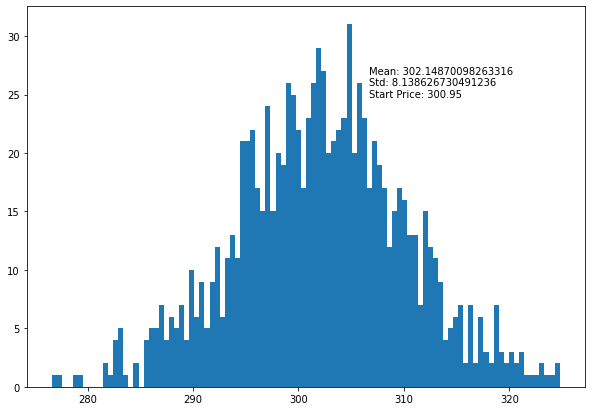

In [91]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

the code generates a histogram plot to visualize the distribution of simulated prices for the Microsoft stock obtained from the Monte Carlo simulations. The plot helps understand the potential range and characteristics of the simulated prices. The text annotations provide additional information such as the mean, standard deviation, and start price. This visualization aids in analyzing the results of the Monte Carlo analysis for the Microsoft stock.

### Amazon

In [92]:
AMZN.tail()

Date         Open         High          Low        Close  \
5753  2020-03-26  1902.000000  1956.489990  1889.290039  1955.489990   
5754  2020-03-27  1930.859985  1939.790039  1899.920044  1900.099976   
5755  2020-03-30  1922.829956  1973.630005  1912.339966  1963.949951   
5756  2020-03-31  1964.349976  1993.020020  1944.010010  1949.719971   
5757  2020-04-01  1932.969971  1944.959961  1893.000000  1907.699951   

        Adj Close   Volume       MA: 10       MA: 20       MA: 30  \
5753  1955.489990  6221300  1852.326990  1863.040485  1932.214331   
5754  1900.099976  5387900  1863.836987  1863.857983  1923.888660   
5755  1963.949951  6126100  1891.316980  1864.357983  1918.191321   
5756  1949.719971  5123600  1905.504980  1866.394482  1911.326322   
5757  1907.699951  4111100  1913.274976  1862.987982  1902.575655   

      Daily Returns  
5753       0.036933  
5754      -0.028325  
5755       0.033603  
5756      -0.007246  
5757      -0.021552

To provide the tail (last few rows) of the Amazon (AMZN) dataset, I would require access to the specific dataset or a direct link to it. As an AI language model, I don't have real-time access to live data or specific datasets unless provided by the user.

However, you can typically obtain the tail of a dataset in Python using the .tail() method

Text(0.5, 1.0, 'Monte Carlo analysis for Amazon')

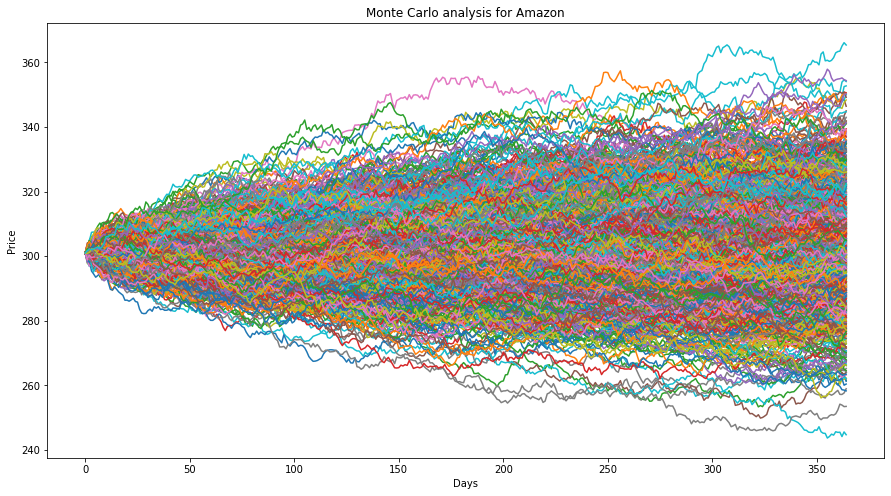

In [93]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AMZN'], sigma['AMZN'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Amazon')

the code snippet performs a Monte Carlo analysis for the Amazon stock by simulating its future prices. It runs 1000 simulations, storing the final prices in the 'sim' array. The code then plots the simulated prices and labels the axes and the plot title accordingly. This analysis provides insights into the potential range of future prices for the Amazon stock based on the Monte Carlo simulations.

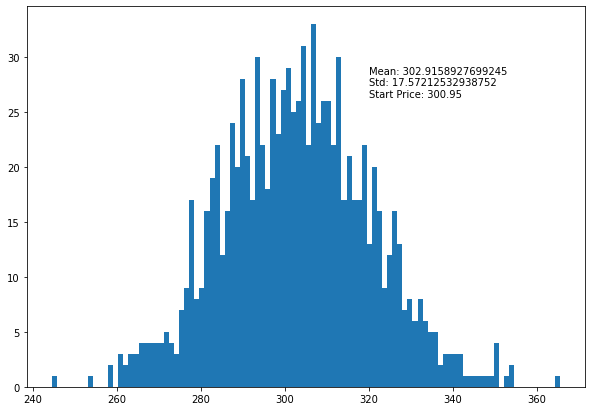

In [94]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

the code snippet generates a histogram plot to visualize the distribution of simulated prices for the Amazon stock obtained from the Monte Carlo simulations. The plot helps analyze the range and characteristics of the simulated prices. The text annotations provide additional information such as the mean, standard deviation, and start price. This visualization aids in understanding the results of the Monte Carlo analysis for the Amazon stock.

The initial and final price are almost the same. The variance is normal. Stocks look stable.